In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÌïÑÏöîÏãú)
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.family'] = 'Malgun Gothic'  # WindowsÏö© ÌïúÍ∏Ä Ìè∞Ìä∏
plt.rcParams['axes.unicode_minus'] = False     # ÎßàÏù¥ÎÑàÏä§(-) Íπ®Ïßê Î∞©ÏßÄ

# =============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Î∞è Î≥ÄÏàò ÏÑ§Ï†ï
# =============================================================================

## (1)ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàòÏóêÏÑú Ï†úÍ±∞Ìïú Ïª¨ÎüºÎì§
```
remove_from_demographic = [
    # 95% Ïù¥ÏÉÅÏù¥ 0Ïù∏ Ï†ÄÏ∂ïÏù¥Ïú†Îì§
    'Ï†ÄÏ∂ïÏù¥Ïú†1',  # 97.8%Í∞Ä 0
    'Ï†ÄÏ∂ïÏù¥Ïú†2',  # 96.3%Í∞Ä 0  
    'Ï†ÄÏ∂ïÏù¥Ïú†4',  # 95.9%Í∞Ä 0
    'Ï†ÄÏ∂ïÏù¥Ïú†8',  # 97.6%Í∞Ä 0
    'Ï†ÄÏ∂ïÏù¥Ïú†9',  # 98.1%Í∞Ä 0
    
    # 98% Ïù¥ÏÉÅÏù¥ 0Ïù∏ Ïã†Ïö©/ÎåÄÏ∂ú Î¨∏Ï†úÎì§
    'Í∏âÏó¨ÎÇ†ÎåÄÏ∂ú',        # 98.1%Í∞Ä 0
    'ÏµúÍ∑º5ÎÖÑÌååÏÇ∞',       # 98.9%Í∞Ä 0
    'ÏµúÍ∑º5ÎÖÑÏïïÎ•òÍ≤ΩÌóò',    # 99.6%Í∞Ä 0
    
    # 90% Ïù¥ÏÉÅÏù¥ 0Ïù∏ Í∏¥Í∏âÏÉÅÌô© ÎåÄÏùëÎì§
    'Í∏¥Í∏âÏßÄÍ∏âÏó∞Í∏∞',      # 96.4%Í∞Ä 0
    'Í∏¥Í∏âÏßÄÏ∂úÏÇ≠Í∞ê',      # 97.7%Í∞Ä 0
    
    # 80% Ïù¥ÏÉÅÏù¥ 0Ïù∏ Ï†ïÎ≥¥ÏàòÏßë Î∞©Î≤ïÎì§ (ÌïòÎÇòÎßå ÏÑ†ÌÉùÌïòÎäî Íµ¨Ï°∞)
    'ÏùÄÌñâÏû°ÏßÄÏã†Î¨∏',      # 91.2%Í∞Ä 0
    'Î≥¥ÌóòÏû°ÏßÄÏã†Î¨∏',      # 88.8%Í∞Ä 0
    
    # ÏãùÎ≥ÑÏö© Î≥ÄÏàòÎì§ (ÏòàÏ∏°Ïóê Î¨¥ÏùòÎØ∏)
    'Ïó∞ÎèÑ',            # Îã®Ïàú ÏÉòÌîå ID
    'Ïó∞ÎèÑÏΩîÎìú',         # Îã®Ïàú ÏÉòÌîå ID
]

# Í≥†Î†§Ìï¥Î≥º ÎßåÌïú Ïª¨ÎüºÎì§ (85-95% = 0)
consider_removing = [
    'Ï†ÄÏ∂ïÏù¥Ïú†3',        # 93.3%Í∞Ä 0 (Í∑∏ÎÇòÎßà ÏùòÎØ∏ ÏûàÏùÑ Ïàò ÏûàÏùå)
    'Ï†ÄÏ∂ïÏù¥Ïú†5',        # 90.9%Í∞Ä 0 (Í∑∏ÎÇòÎßà ÏùòÎØ∏ ÏûàÏùÑ Ïàò ÏûàÏùå)
    'Í∏¥Í∏âÏ∞®Ïö©',         # 90.9%Í∞Ä 0
]
```

In [3]:
# Ï¢ÖÏÜçÎ≥ÄÏàò
targets = ['MMMF', 'CDS', 'NMMF', 'STOCKS', 'RETQLIQ']

# ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàò (Ï§ëÎ≥µ Ï†úÍ±∞)
all_features = [
    # 1. Í∏∞Î≥∏ Ïù∏Íµ¨ÌÜµÍ≥Ñ
    'Í∞ÄÍµ¨Ï£ºÏÑ±Î≥Ñ', 'Ïó∞Î†π', 'Ïó∞Î†πÎåÄÎ∂ÑÎ•ò',
    
    # 2. ÍµêÏú°
    'ÍµêÏú°ÏàòÏ§Ä', 'ÍµêÏú°ÏàòÏ§ÄÎ∂ÑÎ•ò',
    
    # 3. Í≤∞Ìòº/Í∞ÄÏ°±
    'Í≤∞ÌòºÏÉÅÌÉú', 'ÏûêÎÖÄÏàò', 'ÏÉùÏï†Ï£ºÍ∏∞Î∂ÑÎ•ò', 'Í∞ÄÏ°±Íµ¨Ï°∞',
    
    # 4. ÏßÅÏóÖ/Í≥†Ïö©
    'ÎÖ∏ÎèôÎ†•Ï∞∏Ïó¨ÏÉÅÌÉú', 'ÏßÅÏóÖÎ∂ÑÎ•ò1', 'ÏßÅÏóÖÎ∂ÑÎ•ò2', 'ÏÇ∞ÏóÖÎ∂ÑÎ•ò',
    
    # 5. ÏÜåÎìù
    'Ï¥ùÏÜåÎìù', 'Í∏âÏó¨ÏÜåÎìù', 'ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù', 'Ïù¥ÏûêÎ∞∞ÎãπÏÜåÎìù', 'ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù',
    'ÏÇ¨ÌöåÎ≥¥Ïû•Ïó∞Í∏àÏÜåÎìù', 'Ïù¥Ï†ÑÍ∏∞ÌÉÄÏÜåÎìù', 'Ïó∞Í∏àÍ≥ÑÏ¢åÏù∏Ï∂ú', 'Ï†ïÏÉÅÏÜåÎìù',
    
    # 6. ÏÜåÎπÑÌå®ÌÑ¥
    'ÏßëÏóêÏÑúÏãùÏÇ¨ÎπÑÏö©', 'Ïô∏ÏãùÎπÑÏö©', 'Î∞∞Îã¨ÏùåÏãùÎπÑÏö©', 'ÏûÑÎåÄÎ£å',
    'ÎçîÎßéÏù¥ÏßÄÏ∂ú', 'ÎçúÏßÄÏ∂ú', 'ÏßÄÏ∂úÍ≥†Ï†Ä',
    
    # 7. Í∏àÏúµ ÌñâÎèô/ÏÑ±Ìñ•
    'Ï†ÄÏ∂ïÏó¨Î∂Ä', 'Ï†ÄÏ∂ïÌï®',
    'Í∏àÏúµÏßÄÏãù', 'Í∏àÏúµÏúÑÌóòÍ∞êÏàò', 'Í∏àÏúµÏúÑÌóòÌöåÌîº', 'Í∏àÏúµÎ¨∏Ìï¥Î†•',
    
    # 8. Ïã†Ïö©/ÎåÄÏ∂ú Í≤ΩÌóò
    'Ïó∞Ï≤¥Í≤ΩÌóò', '60ÏùºÏó∞Ï≤¥', 'Ïã†Ïö©Ïπ¥ÎìúÏã†Ï≤≠',
    'Ïã†Ïö©Í±∞Î∂ÄÍ≤ΩÌóò', 'Í±∞Î∂ÄÎëêÎ†§ÏõÄ', 'Í±∞Î∂ÄÎëêÎ†§ÏõÄÏúºÎ°úÏã†Ï≤≠ÏïàÌï®',
    
    # 9. Í∏¥Í∏âÏÉÅÌô© ÎåÄÏùë
    'Í∏¥Í∏âÏ∞®Ïö©', 'Í∏¥Í∏âÏ†ÄÏ∂ïÏÇ¨Ïö©', 'Í∏¥Í∏âÏ∂îÍ∞ÄÍ∑ºÎ¨¥',
    'Í∞ÄÏ°±ÏπúÍµ¨Ï∞®Ïö©', 'Ïã†Ïö©Ïπ¥ÎìúÏ∞®Ïö©', 'ÎåÄÏïàÏ∞®Ïö©', 'Í∏àÏúµÍ∏∞Í¥ÄÏ∞®Ïö©', 
    'Í∏àÏúµÏ†ÄÏ∂ïÏÇ¨Ïö©', 'ÎπÑÍ∏àÏúµÏ†ÄÏ∂ïÏÇ¨Ïö©', 'ÏßÄÍ∏âÏó∞Í∏∞', 'ÎåÄÏ∂úÏó∞Í∏∞', 'Í∏∞ÌÉÄÏó∞Í∏∞', 
    'ÏãùÎπÑÏ†àÏïΩ', 'Ïò§ÎùΩÎπÑÏ†àÏïΩ', 'Í∏∞ÌÉÄÏ†àÏïΩ',
    
    # 10. Í∏àÏúµÏÉÅÌíà ÏáºÌïë
    'ÏùÄÌñâÏÉÅÌíàÎØ∏ÏáºÌïë', 'ÏùÄÌñâÏÉÅÌíàÏ°∞Í∏àÏáºÌïë', 'ÏùÄÌñâÏÉÅÌíàÎßéÏù¥ÏáºÌïë',
    'Î≥¥ÌóòÏÉÅÌíàÎØ∏ÏáºÌïë', 'Î≥¥ÌóòÏÉÅÌíàÏ°∞Í∏àÏáºÌïë', 'Î≥¥ÌóòÏÉÅÌíàÎßéÏù¥ÏáºÌïë',
    
    # 11. Ï†ïÎ≥¥ÏàòÏßë (ÏùÄÌñâ)
    'ÏùÄÌñâÏ†ÑÌôîÎ¨∏Ïùò', 'ÏùÄÌñâÏö∞Ìé∏Í¥ëÍ≥†TV', 'ÏùÄÌñâÏù∏ÌÑ∞ÎÑ∑', 'ÏùÄÌñâÏßÄÏù∏Ï∂îÏ≤ú',
    'ÏùÄÌñâÍ∏àÏúµÏ†ÑÎ¨∏Í∞Ä', 'ÏùÄÌñâÏä§Ïä§Î°úÏ°∞ÏÇ¨', 'ÏùÄÌñâÏ†ïÎ≥¥ÏàòÏßëÏïàÌï®',
    
    # 12. Ï†ïÎ≥¥ÏàòÏßë (Î≥¥Ìóò)
    'Î≥¥ÌóòÏ†ÑÌôîÎ¨∏Ïùò', 'Î≥¥ÌóòÏö∞Ìé∏Í¥ëÍ≥†TV', 'Î≥¥ÌóòÏù∏ÌÑ∞ÎÑ∑', 'Î≥¥ÌóòÏßÄÏù∏Ï∂îÏ≤ú',
    'Î≥¥ÌóòÍ∏àÏúµÏ†ÑÎ¨∏Í∞Ä', 'Î≥¥ÌóòÏä§Ïä§Î°úÏ°∞ÏÇ¨', 'Î≥¥ÌóòÏ†ïÎ≥¥ÏàòÏßëÏïàÌï®',
    
    # 13. Í∏∞ÌÉÄ
    'Ïù∏ÌÑ∞ÎÑ∑ÏÇ¨Ïö©', 'ÏùÄÌñâÍ∏àÏúµÍ≥ÑÌöç', 'Î≥¥ÌóòÍ∏àÏúµÍ≥ÑÌöç'
]

# Í∏àÏúµ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàò (Ï§ëÎ≥µ Ï†úÍ±∞, 2Î≤àÏö©)
financial_features = [
    # 1. Í∏∞Î≥∏ Í∏àÏúµ ÏûêÏÇ∞
    'ÎãπÏ¢åÏòàÍ∏àÎ≥¥Ïú†', 'ÎãπÏ¢åÏòàÍ∏àÎ≥¥Ïú†Ïó¨Î∂Ä', 'ÏÑ†Î∂àÏπ¥Îìú', 'Ï†ÄÏ∂ïÏòàÍ∏àÎ≥¥Ïú†', 'Ï†ÄÏ∂ïÏòàÍ∏àÎ≥¥Ïú†Ïó¨Î∂Ä', 
    
    # 2. Îã®Í∏∞Í∏àÏúµÏÉÅÌíà
    'Îã®Í∏∞Í∏àÏúµÏÉÅÌíàÏòàÍ∏à', 'Îã®Í∏∞Í∏àÏúµÏÉÅÌíàÌéÄÎìú', 'Îã®Í∏∞Í∏àÏúµÏÉÅÌíàÍ≥ÑÏ¢å', 'Îã®Í∏∞Í∏àÏúµÏÉÅÌíàÎ≥¥Ïú†Ïó¨Î∂Ä',
    'ÏΩúÍ≥ÑÏ¢å', 'ÏΩúÍ≥ÑÏ¢åÎ≥¥Ïú†Ïó¨Î∂Ä', 
    
    # 3. Ìà¨ÏûêÏÉÅÌíà
    'Ï£ºÏãùÎ≥¥Ïú†', 'Ï£ºÏãùÎ≥¥Ïú†Ïàò', 'ÏúåÏÖîÏßÄÏàò', 'Ï±ÑÍ∂åÎ≥¥Ïú†', 'Ï±ÑÍ∂åÎ≥¥Ïú†Ïó¨Î∂Ä',
    'ÎπÑÍ≥ºÏÑ∏Ï±ÑÍ∂å', 'Î™®Í∏∞ÏßÄÏ±ÑÍ∂å', 'Ï†ïÎ∂ÄÏ±ÑÍ∂å', 'Í∏∞ÌÉÄÏ±ÑÍ∂å',
    
    # 4. ÎÆ§Ï∂îÏñºÌéÄÎìú
    'Ï£ºÏãùÎÆ§Ï∂îÏñºÌéÄÎìú', 'Î©¥ÏÑ∏Ï±ÑÍ∂åÎÆ§Ï∂îÏñºÌéÄÎìú', 'Ï†ïÎ∂ÄÏ±ÑÍ∂åÎÆ§Ï∂îÏñºÌéÄÎìú', 'Í∏∞ÌÉÄÏ±ÑÍ∂åÎÆ§Ï∂îÏñºÌéÄÎìú',
    'Î≥µÌï©ÎÆ§Ï∂îÏñºÌéÄÎìú', 'Í∏∞ÌÉÄÎÆ§Ï∂îÏñºÌéÄÎìú', 
    
    # 5. Ìà¨Ïûê Í¥ÄÎ†®
    'Ï§ëÍ∞úÍ≥ÑÏ¢åÎ≥¥Ïú†Ïó¨Î∂Ä', 'Í±∞ÎûòÌôúÎèôÏó¨Î∂Ä', 'Í±∞ÎûòÌöüÏàò',
    
    # 6. Ìá¥ÏßÅ/Ïó∞Í∏à ÏûêÏÇ∞
    'IRAÍ≥ÑÏ¢åÎ≥¥Ïú†Ïó¨Î∂Ä', 'Ï†àÏïΩÍ≥ÑÌöç', 'ÎØ∏ÎûòÏó∞Í∏à', 'ÌòÑÏû¨Ïó∞Í∏à', 'Ïó∞Í∏àÎ≥¥Ïú†', 'Ìá¥ÏßÅÏûêÎ≥∏',
    'ÌôïÏ†ïÍ∏âÏó¨ÌòïÌá¥ÏßÅÏó∞Í∏àÌòÑÏû¨ÏßÅÏû•', 'ÌôïÏ†ïÍ∏∞Ïó¨ÌòïÌá¥ÏßÅÏó∞Í∏àÌòÑÏû¨ÏßÅÏû•', 
    'ÌôïÏ†ïÍ∏âÏó¨ÌòïÌá¥ÏßÅÏó∞Í∏àÏù¥ÏßÅ', 'Ìá¥ÏßÅÏó∞Í∏àÌòÑÏû¨ÏßÅÏû•',
    
    # 7. Í∏∞ÌÉÄ Í∏àÏúµÏÉÅÌíà
    'Ï†ÄÏ∂ïÏ±ÑÍ∂å', 'Ï†ÄÏ∂ïÏ±ÑÍ∂åÎ≥¥Ïú†Ïó¨Î∂Ä', 'ÌòÑÍ∏àÍ∞ÄÏπòÏÉùÎ™ÖÎ≥¥Ìóò', 'ÌòÑÍ∏àÍ∞ÄÏπòÏÉùÎ™ÖÎ≥¥ÌóòÎ≥¥Ïú†Ïó¨Î∂Ä',
    'Ïó∞Í∏àÎ≥¥Ìóò', 'Ïã†ÌÉÅ', 'Í∏∞ÌÉÄÍ¥ÄÎ¶¨Í≥ÑÏ¢å', 'Í∏∞ÌÉÄÍ¥ÄÎ¶¨Í≥ÑÏ¢åÎ≥¥Ïú†Ïó¨Î∂Ä',
    'Í∏∞ÌÉÄÍ∏àÏúµÏûêÏÇ∞', 'Í∏∞ÌÉÄÍ∏àÏúµÏûêÏÇ∞Î≥¥Ïú†Ïó¨Î∂Ä',
    
    # 8. Î∂ÄÎèôÏÇ∞ ÏûêÏÇ∞
    'Ï£ºÌÉùÎ≥¥Ïú†', 'Ï£ºÌÉùÎ≥¥Ïú†Ïó¨Î∂Ä', 'Ï£ºÌÉùÎ∂ÑÎ•ò', 'ÏûêÍ∏∞ÏûêÎ≥∏', 'ÏûêÍ∏∞ÏûêÎ≥∏Î≥¥Ïú†Ïó¨Î∂Ä',
    'Í∏∞ÌÉÄÎ∂ÄÎèôÏÇ∞', 'Í∏∞ÌÉÄÎ∂ÄÎèôÏÇ∞Î≥¥Ïú†Ïó¨Î∂Ä', 'ÎπÑÍ±∞Ï£ºÎ∂ÄÎèôÏÇ∞ÏàúÍ∞ÄÏπò', 'ÎπÑÍ±∞Ï£ºÎ∂ÄÎèôÏÇ∞ÏàúÍ∞ÄÏπòÎ≥¥Ïú†Ïó¨Î∂Ä',
    
    # 9. Í∏∞ÌÉÄ Ïã§Î¨ºÏûêÏÇ∞
    'Í∏∞ÌÉÄÎπÑÍ∏àÏúµÏûêÏÇ∞', 'Í∏∞ÌÉÄÎπÑÍ∏àÏúµÏûêÏÇ∞Î≥¥Ïú†Ïó¨Î∂Ä',
    
    # 10. Ï¥ùÍ≥Ñ Î∞è ÏàúÏûêÏÇ∞
    'Ï¥ùÍ∏àÏúµÏûêÏÇ∞', 'Ï¥ùÍ∏àÏúµÏûêÏÇ∞Î≥¥Ïú†Ïó¨Î∂Ä', 'Ï¥ùÎπÑÍ∏àÏúµÏûêÏÇ∞', 'Ï¥ùÎπÑÍ∏àÏúµÏûêÏÇ∞Î≥¥Ïú†Ïó¨Î∂Ä',
    'ÏàúÎπÑÍ∏àÏúµÏûêÏÇ∞', 'Ï¥ùÏûêÏÇ∞Î≥¥Ïú†Ïó¨Î∂Ä', 'ÏàúÏûêÏÇ∞'
]

print("=== Î≥ÄÏàò ÏÑ§Ï†ï ÏôÑÎ£å===")
print(f"Ï¢ÖÏÜçÎ≥ÄÏàò: {targets}")
print(f"ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàò: {len(all_features)}Í∞ú")

=== Î≥ÄÏàò ÏÑ§Ï†ï ÏôÑÎ£å===
Ï¢ÖÏÜçÎ≥ÄÏàò: ['MMMF', 'CDS', 'NMMF', 'STOCKS', 'RETQLIQ']
ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàò: 79Í∞ú


# =============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Î∞è Î≥ÄÏàò ÏÑ§Ï†ï
# =============================================================================

In [5]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
original_df = pd.read_csv('C:/Project2/CodeDoc/data/SCFP/SCFP2022_ÌïúÍ∏Ä.csv')

# Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±(3Î≤àÏö©)
df_financial = original_df[financial_features].copy()

# ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df_all_features = original_df[all_features].copy()

In [6]:
# Ïã§Ï†ú Í∏àÏï° Ïª¨ÎüºÎ™ÖÏóê ÎßûÏ∂∞ Ï¢ÖÏÜçÎ≥ÄÏàò ÏÉùÏÑ±
target_mapping = {
    'MMMF': 'Îã®Í∏∞Í∏àÏúµÏÉÅÌíàÌéÄÎìú',           # Ïú†ÎèôÏÑ±ÏûêÏÇ∞ Í∏àÏï°Ïù¥ 0 Ïù¥ÏÉÅÏù¥Î©¥ 1
    'CDS': 'ÏñëÎèÑÏÑ±ÏòàÍ∏àÏ¶ùÏÑú',             # Ï†ïÍ∏∞ÏòàÍ∏à Í∏àÏï°Ïù¥ 0 Ïù¥ÏÉÅÏù¥Î©¥ 1  
    'NMMF': 'ÎπÑÎ®∏ÎãàÎßàÏºìÌéÄÎìú',      # ÎπÑÎ®∏ÎãàÎßàÏºìÌéÄÎìú Í∏àÏï°Ïù¥ 0 Ïù¥ÏÉÅÏù¥Î©¥ 1
    'STOCKS': 'Ï£ºÏãùÎ≥¥Ïú†',             # Ï£ºÏãù Í∏àÏï°Ïù¥ 0 Ïù¥ÏÉÅÏù¥Î©¥ 1
    'RETQLIQ': 'Ìá¥ÏßÅÏ§ÄÎπÑÍ∏àÏú†ÎèôÏÑ±'         # Ìá¥ÏßÅÏó∞Í∏à Í∏àÏï°Ïù¥ 0 Ïù¥ÏÉÅÏù¥Î©¥ 1
}

for target, amount_col in target_mapping.items():
    if amount_col in original_df.columns:
        # Í∏àÏï°Ïù¥ 0Î≥¥Îã§ ÌÅ¨Î©¥ 1(Î≥¥Ïú†), ÏïÑÎãàÎ©¥ 0(ÎØ∏Î≥¥Ïú†)
        df_financial[target] = (original_df[amount_col] > 0).astype(int)
        df_all_features[target] = (original_df[amount_col] > 0).astype(int)
        
        # Î≥¥Ïú†Ïú® ÌôïÏù∏
        holding_rate = df_financial[target].mean()
        print(f"{target} ({amount_col}): Î≥¥Ïú†Ïú® {holding_rate*100:.1f}%")
    else:
        print(f"‚ö†Ô∏è {amount_col} Ïª¨ÎüºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(f"\n=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥:===")
print(f"Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_financial.shape}")
print(f"ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_all_features.shape}")


MMMF (Îã®Í∏∞Í∏àÏúµÏÉÅÌíàÌéÄÎìú): Î≥¥Ïú†Ïú® 4.2%
CDS (ÏñëÎèÑÏÑ±ÏòàÍ∏àÏ¶ùÏÑú): Î≥¥Ïú†Ïú® 7.8%
NMMF (ÎπÑÎ®∏ÎãàÎßàÏºìÌéÄÎìú): Î≥¥Ïú†Ïú® 20.0%
STOCKS (Ï£ºÏãùÎ≥¥Ïú†): Î≥¥Ïú†Ïú® 29.1%
RETQLIQ (Ìá¥ÏßÅÏ§ÄÎπÑÍ∏àÏú†ÎèôÏÑ±): Î≥¥Ïú†Ïú® 59.1%

=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥:===
Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (22975, 72)
ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (22975, 84)


# =============================================================================
# 3. Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏
# =============================================================================


In [7]:
print(f"\n=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥:===")
print(f"Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_financial.shape}")
print(f"ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_all_features.shape}")
print(f"Ï¢ÖÏÜçÎ≥ÄÏàò Ï°¥Ïû¨ Ïó¨Î∂Ä: {[col for col in targets if col in df_financial.columns]}")
print(f"Í∏àÏúµ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàò Ï°¥Ïû¨ Ïó¨Î∂Ä: {len([col for col in financial_features if col in df_financial.columns])}Í∞ú")
print(f"ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàò Ï°¥Ïû¨ Ïó¨Î∂Ä: {len([col for col in df_all_features if col in df_all_features.columns])}Í∞ú")

# Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Í∞í ÌôïÏù∏
print(f"\n‚Äª Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Í∞í ÌôïÏù∏:")
financial_missing_info = df_financial[financial_features + targets].isnull().sum()
if financial_missing_info.sum() > 0:
    print(f"‚óé Í∏àÏúµ Í¥ÄÎ†® Í≤∞Ï∏°Í∞í ÏûàÎäî Ïª¨Îüº:")
    print(financial_missing_info[financial_missing_info > 0])
else:
    print("‚ñ∂ Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°Í∞í ÏóÜÏùå")

# ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Í∞í ÌôïÏù∏
print(f"\n‚Äª ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Í∞í ÌôïÏù∏:")
demographic_missing_info = df_all_features[all_features + targets].isnull().sum()
if demographic_missing_info.sum() > 0:
    print(f"‚óé ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Í≤∞Ï∏°Í∞í ÏûàÎäî Ïª¨Îüº:")
    print(demographic_missing_info[demographic_missing_info > 0])
else:
    print("‚ñ∂ ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°Í∞í ÏóÜÏùå")


=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥:===
Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (22975, 72)
ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (22975, 84)
Ï¢ÖÏÜçÎ≥ÄÏàò Ï°¥Ïû¨ Ïó¨Î∂Ä: ['MMMF', 'CDS', 'NMMF', 'STOCKS', 'RETQLIQ']
Í∏àÏúµ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàò Ï°¥Ïû¨ Ïó¨Î∂Ä: 67Í∞ú
ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàò Ï°¥Ïû¨ Ïó¨Î∂Ä: 84Í∞ú

‚Äª Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Í∞í ÌôïÏù∏:
‚ñ∂ Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°Í∞í ÏóÜÏùå

‚Äª ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Í∞í ÌôïÏù∏:
‚ñ∂ ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°Í∞í ÏóÜÏùå


# =============================================================================
# 4. Í∞ÑÎã®Ìïú ÏÉÅÍ¥ÄÍ≥ÑÏàò Ï§ëÏöîÎèÑ
# =============================================================================

In [8]:
print("\n" + "="*60)
print("‚ñ∂ ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÌäπÏÑ± - ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∏∞Î∞ò Ï§ëÏöîÎèÑ")
print("="*60)

demographic_correlation_results = {}

for target in targets:
    if target not in df_all_features.columns:
        continue
        
    print(f"\n‚ñ∂ {target} ÏÉÅÏúÑ Ï§ëÏöî ÌäπÏÑ±:")
    
    # ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
    correlations = []
    for feature in all_features:
        if feature in df_all_features.columns:
            corr = df_all_features[feature].corr(df_all_features[target])
            if not pd.isna(corr):
                correlations.append((feature, abs(corr), corr))
    
    # ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌÅ¨Í∏∞Ïàú Ï†ïÎ†¨
    correlations.sort(key=lambda x: x[1], reverse=True)
    demographic_correlation_results[target] = correlations
    
    # ÏÉÅÏúÑ 5Í∞ú Ï∂úÎ†•
    for i, (feature, abs_corr, orig_corr) in enumerate(correlations[:5]):
        direction = "+" if orig_corr > 0 else "-"
        print(f"  {i+1}. {feature:<25} ÏÉÅÍ¥ÄÍ≥ÑÏàò: {abs_corr:.3f} ({direction})")


‚ñ∂ ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÌäπÏÑ± - ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∏∞Î∞ò Ï§ëÏöîÎèÑ

‚ñ∂ MMMF ÏÉÅÏúÑ Ï§ëÏöî ÌäπÏÑ±:
  1. ÍµêÏú°ÏàòÏ§Ä                      ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.144 (+)
  2. ÍµêÏú°ÏàòÏ§ÄÎ∂ÑÎ•ò                    ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.134 (+)
  3. Í∏àÏúµÏúÑÌóòÌöåÌîº                    ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.122 (-)
  4. Í∏àÏúµÏ†ÄÏ∂ïÏÇ¨Ïö©                    ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.118 (+)
  5. Í∏¥Í∏âÏ†ÄÏ∂ïÏÇ¨Ïö©                    ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.117 (+)

‚ñ∂ CDS ÏÉÅÏúÑ Ï§ëÏöî ÌäπÏÑ±:
  1. Ïó∞Î†π                        ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.148 (+)
  2. Ïó∞Î†πÎåÄÎ∂ÑÎ•ò                     ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.144 (+)
  3. Í∏àÏúµÏ†ÄÏ∂ïÏÇ¨Ïö©                    ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.141 (+)
  4. Í∏¥Í∏âÏ†ÄÏ∂ïÏÇ¨Ïö©                    ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.137 (+)
  5. ÍµêÏú°ÏàòÏ§ÄÎ∂ÑÎ•ò                    ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.116 (+)

‚ñ∂ NMMF ÏÉÅÏúÑ Ï§ëÏöî ÌäπÏÑ±:
  1. ÍµêÏú°ÏàòÏ§Ä                      ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.335 (+)
  2. ÍµêÏú°ÏàòÏ§ÄÎ∂ÑÎ•ò                    ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.324 (+)
  3. Í∏¥Í∏âÏ†ÄÏ∂ïÏÇ¨Ïö©                    ÏÉÅÍ¥ÄÍ≥ÑÏàò

# =============================================================================
# 5. Random Forest Ï§ëÏöîÎèÑ
# =============================================================================

In [9]:
print("\n" + "="*60)
print("‚ñ∂ ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÌäπÏÑ± - Random Forest Ï§ëÏöîÎèÑ")
print("="*60)

demographic_rf_results = {}

for target in targets:
    if target not in df_all_features.columns:
        continue
        
    print(f"\n‚ñ∂ {target} Random Forest Ï§ëÏöîÎèÑ:")
    
    # Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
    X = df_all_features[all_features].fillna(0)  # Í∞ÑÎã®Ìûà Í≤∞Ï∏°Í∞íÏùÑ 0ÏúºÎ°ú Ï≤òÎ¶¨
    y = df_all_features[target]
    
    # Random Forest ÌïôÏäµ
    rf = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=5)
    rf.fit(X, y)
    
    # Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
    importances = rf.feature_importances_
    feature_importance = list(zip(all_features, importances))
    feature_importance.sort(key=lambda x: x[1], reverse=True)
    
    demographic_rf_results[target] = feature_importance
    
    # ÏÉÅÏúÑ 5Í∞ú Ï∂úÎ†•
    for i, (feature, importance) in enumerate(feature_importance[:5]):
        print(f"  {i+1}. {feature:<25} Ï§ëÏöîÎèÑ: {importance:.3f}")


‚ñ∂ ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÌäπÏÑ± - Random Forest Ï§ëÏöîÎèÑ

‚ñ∂ MMMF Random Forest Ï§ëÏöîÎèÑ:
  1. Ïù¥ÏûêÎ∞∞ÎãπÏÜåÎìù                    Ï§ëÏöîÎèÑ: 0.139
  2. Ï†ïÏÉÅÏÜåÎìù                      Ï§ëÏöîÎèÑ: 0.098
  3. Ï¥ùÏÜåÎìù                       Ï§ëÏöîÎèÑ: 0.085
  4. ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù                    Ï§ëÏöîÎèÑ: 0.054
  5. ÍµêÏú°ÏàòÏ§Ä                      Ï§ëÏöîÎèÑ: 0.050

‚ñ∂ CDS Random Forest Ï§ëÏöîÎèÑ:
  1. Ïù¥ÏûêÎ∞∞ÎãπÏÜåÎìù                    Ï§ëÏöîÎèÑ: 0.185
  2. Ï†ïÏÉÅÏÜåÎìù                      Ï§ëÏöîÎèÑ: 0.077
  3. Ï¥ùÏÜåÎìù                       Ï§ëÏöîÎèÑ: 0.066
  4. Ïó∞Î†π                        Ï§ëÏöîÎèÑ: 0.054
  5. Ïó∞Î†πÎåÄÎ∂ÑÎ•ò                     Ï§ëÏöîÎèÑ: 0.045

‚ñ∂ NMMF Random Forest Ï§ëÏöîÎèÑ:
  1. Ïù¥ÏûêÎ∞∞ÎãπÏÜåÎìù                    Ï§ëÏöîÎèÑ: 0.220
  2. Ï†ïÏÉÅÏÜåÎìù                      Ï§ëÏöîÎèÑ: 0.173
  3. Ï¥ùÏÜåÎìù                       Ï§ëÏöîÎèÑ: 0.142
  4. ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù                    Ï§ëÏöîÎèÑ: 0.105
  5. ÍµêÏú°ÏàòÏ§ÄÎ∂ÑÎ•ò                   

# =============================================================================
# 6. Í∞ÑÎã®Ìïú ÏãúÍ∞ÅÌôî
# =============================================================================

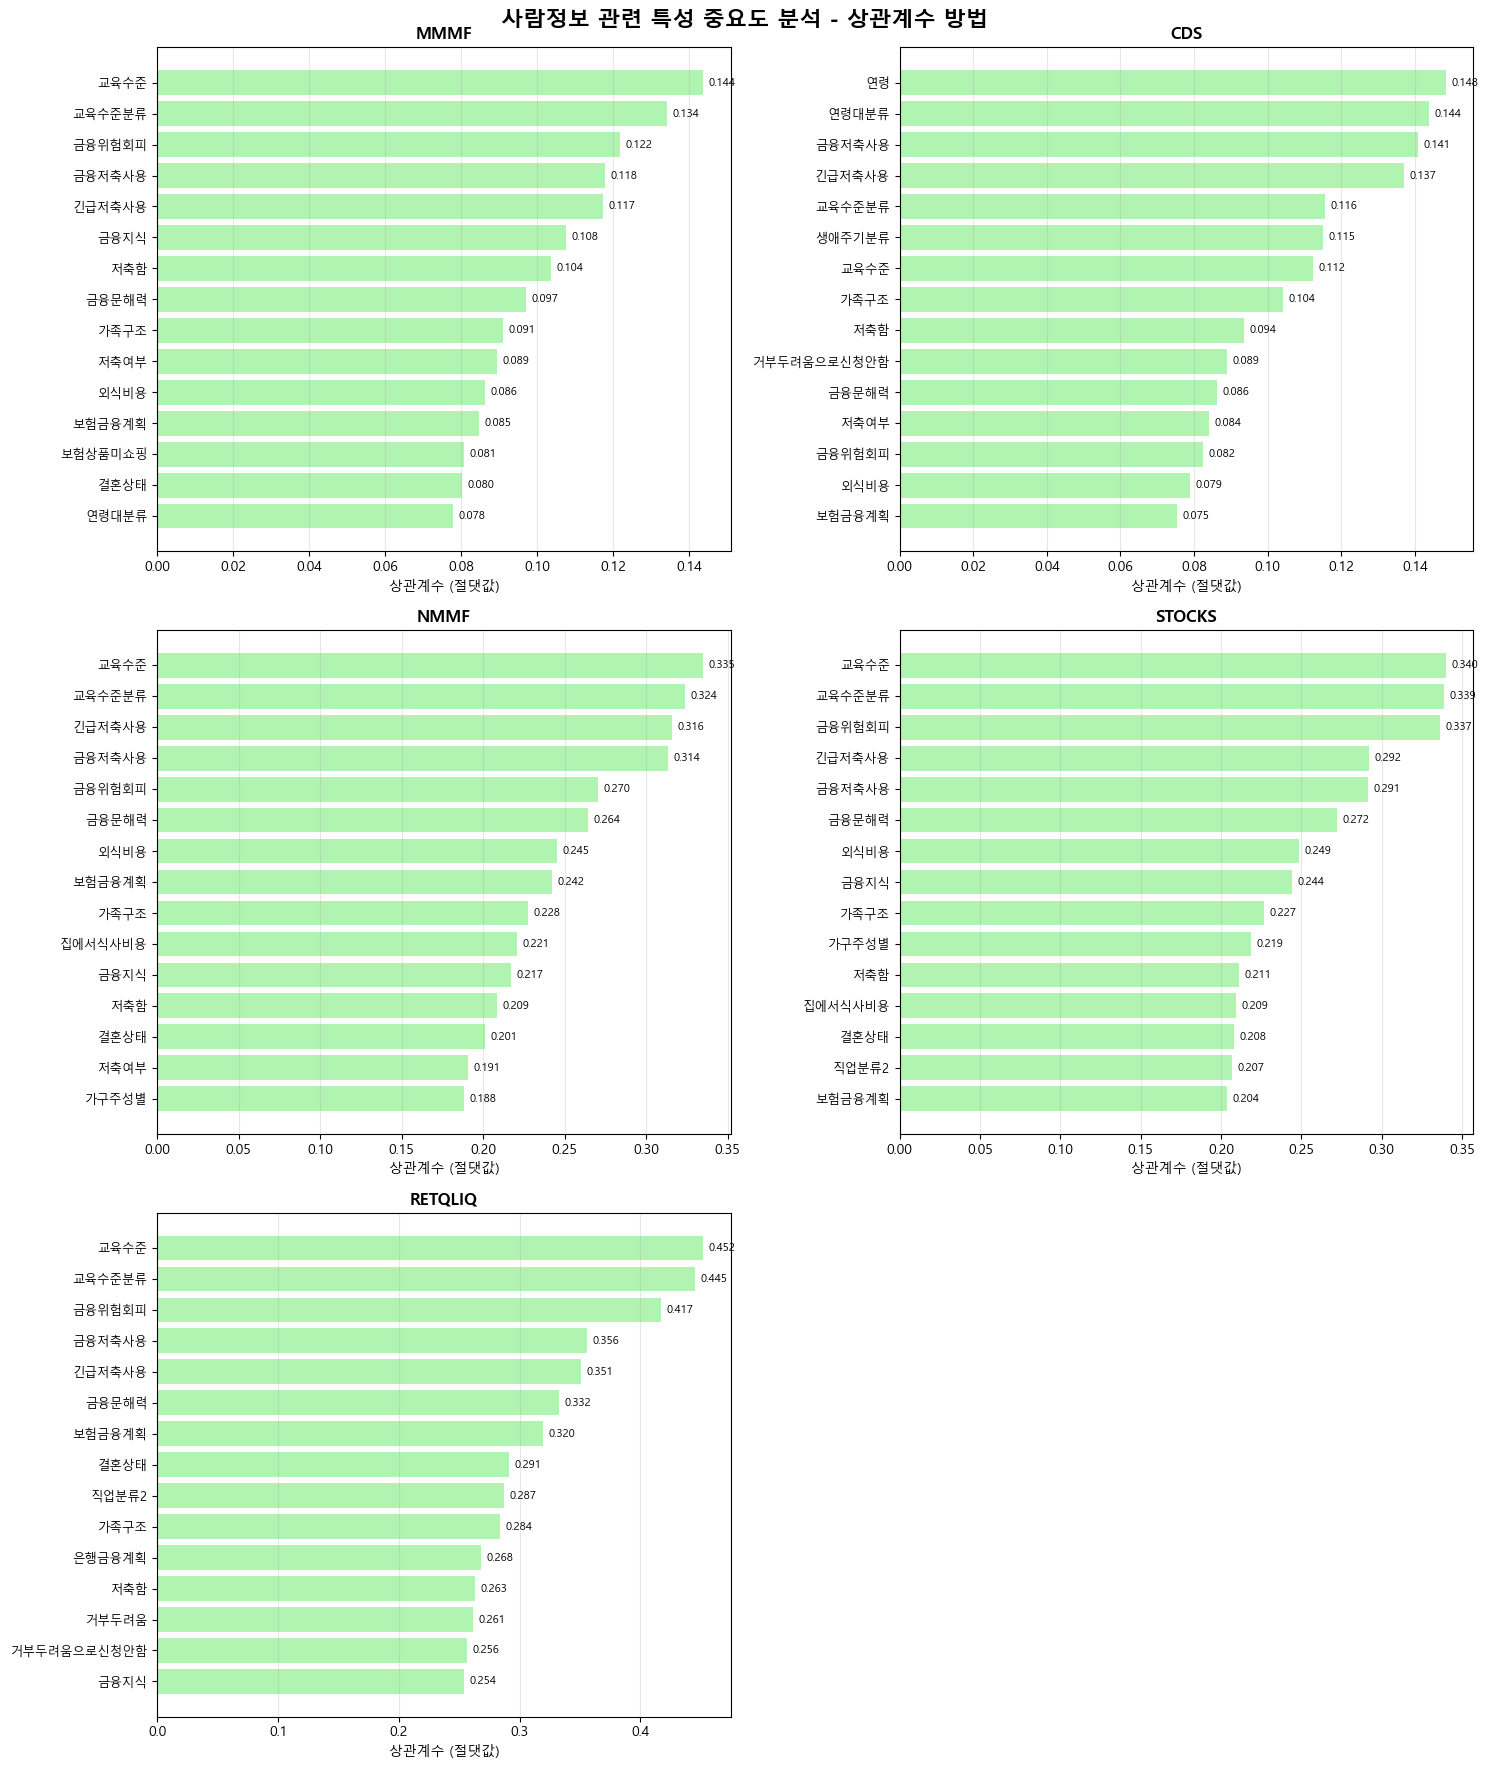

In [10]:
# 3. ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® - ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∑∏ÎûòÌîÑ
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù - ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∞©Î≤ï', fontsize=16, fontweight='bold')

for i, target in enumerate(targets):
    if target not in demographic_correlation_results:
        continue
        
    row = i // 2
    col = i % 2
    
    # ÏÉÅÏúÑ 15Í∞ú ÌäπÏÑ± ÏÑ†ÌÉù
    top_15 = demographic_correlation_results[target][:15]
    features_list = [item[0] for item in top_15]
    correlations_list = [item[1] for item in top_15]
    
    # Í∞ÄÎ°ú ÎßâÎåÄ Í∑∏ÎûòÌîÑ
    y_pos = range(len(features_list))
    bars = axes[row, col].barh(y_pos, correlations_list, color='lightgreen', alpha=0.7)
    
    # ÏÑ§Ï†ï
    axes[row, col].set_yticks(y_pos)
    axes[row, col].set_yticklabels(features_list, fontsize=9)
    axes[row, col].set_xlabel('ÏÉÅÍ¥ÄÍ≥ÑÏàò (Ï†àÎåìÍ∞í)', fontsize=10)
    axes[row, col].set_title(f'{target}', fontsize=12, fontweight='bold')
    axes[row, col].grid(axis='x', alpha=0.3)
    
    # ÎßâÎåÄ ÎÅùÏóê Í∞í ÌëúÏãú
    for j, v in enumerate(correlations_list):
        if correlations_list:
            axes[row, col].text(v + max(correlations_list)*0.01, j, f'{v:.3f}', 
                               va='center', fontsize=8)
    
    # yÏ∂ï ÏàúÏÑú Îí§ÏßëÍ∏∞ (ÎÜíÏùÄ Í∞íÏù¥ ÏúÑÎ°ú)
    axes[row, col].invert_yaxis()

# Îπà subplot Ïà®Í∏∞Í∏∞
if len(targets) == 5:
    axes[2, 1].set_visible(False)

plt.tight_layout()
# Í∑∏ÎûòÌîÑ Ï†ÄÏû•
plt.savefig('chart/demographic_correlation_importance.png', dpi=300, bbox_inches='tight')

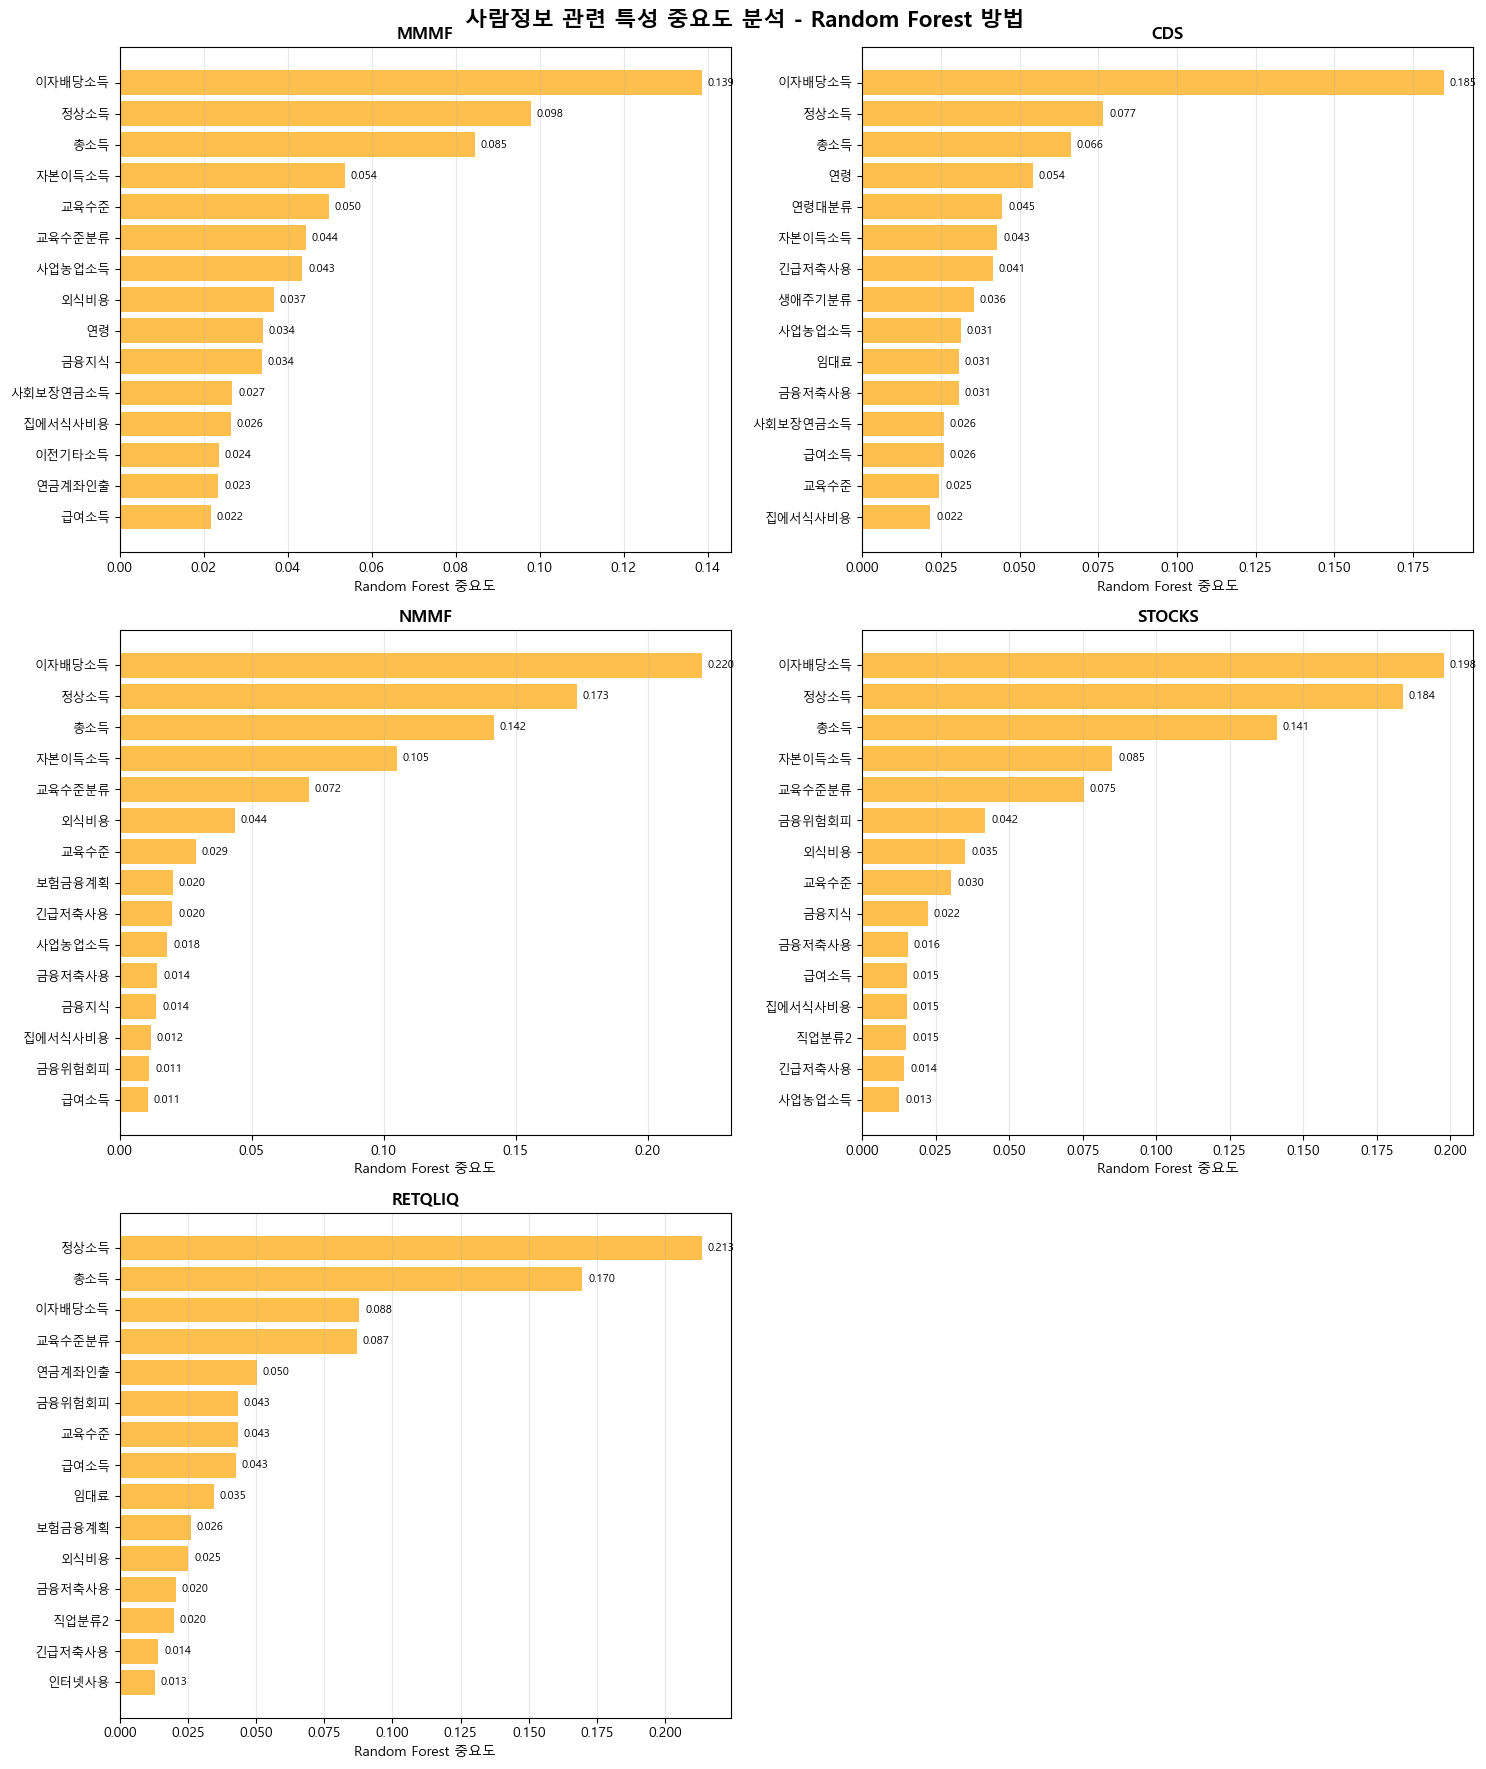

In [11]:
# 4. ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® - Random Forest Í∑∏ÎûòÌîÑ
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù - Random Forest Î∞©Î≤ï', fontsize=16, fontweight='bold')

for i, target in enumerate(targets):
    if target not in demographic_rf_results:
        continue
        
    row = i // 2
    col = i % 2
    
    # ÏÉÅÏúÑ 15Í∞ú ÌäπÏÑ± ÏÑ†ÌÉù
    top_15 = demographic_rf_results[target][:15]
    features_list = [item[0] for item in top_15]
    importance_list = [item[1] for item in top_15]
    
    # Í∞ÄÎ°ú ÎßâÎåÄ Í∑∏ÎûòÌîÑ
    y_pos = range(len(features_list))
    bars = axes[row, col].barh(y_pos, importance_list, color='orange', alpha=0.7)
    
    # ÏÑ§Ï†ï
    axes[row, col].set_yticks(y_pos)
    axes[row, col].set_yticklabels(features_list, fontsize=9)
    axes[row, col].set_xlabel('Random Forest Ï§ëÏöîÎèÑ', fontsize=10)
    axes[row, col].set_title(f'{target}', fontsize=12, fontweight='bold')
    axes[row, col].grid(axis='x', alpha=0.3)
    
    # ÎßâÎåÄ ÎÅùÏóê Í∞í ÌëúÏãú
    for j, v in enumerate(importance_list):
        if importance_list:
            axes[row, col].text(v + max(importance_list)*0.01, j, f'{v:.3f}', 
                               va='center', fontsize=8)
    
    # yÏ∂ï ÏàúÏÑú Îí§ÏßëÍ∏∞ (ÎÜíÏùÄ Í∞íÏù¥ ÏúÑÎ°ú)
    axes[row, col].invert_yaxis()

# Îπà subplot Ïà®Í∏∞Í∏∞
if len(targets) == 5:
    axes[2, 1].set_visible(False)

plt.tight_layout()
# Í∑∏ÎûòÌîÑ Ï†ÄÏû•
plt.savefig('chart/demographic_randomforest_importance.png', dpi=300, bbox_inches='tight')

# =============================================================================
# ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù/ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù Ïù¥ÏßÑÌôî ÌõÑ ÏÑ±Îä• ÎπÑÍµê
# =============================================================================

MMMF (Îã®Í∏∞Í∏àÏúµÏÉÅÌíàÌéÄÎìú): Î≥¥Ïú†Ïú® 4.2%
CDS (ÏñëÎèÑÏÑ±ÏòàÍ∏àÏ¶ùÏÑú): Î≥¥Ïú†Ïú® 7.8%
NMMF (ÎπÑÎ®∏ÎãàÎßàÏºìÌéÄÎìú): Î≥¥Ïú†Ïú® 20.0%
STOCKS (Ï£ºÏãùÎ≥¥Ïú†): Î≥¥Ïú†Ïú® 29.1%
RETQLIQ (Ìá¥ÏßÅÏ§ÄÎπÑÍ∏àÏú†ÎèôÏÑ±): Î≥¥Ïú†Ïú® 59.1%

=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥:===
Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (22975, 72)
ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (22975, 84)

=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥:===
Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (22975, 72)
ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (22975, 84)
Ï¢ÖÏÜçÎ≥ÄÏàò Ï°¥Ïû¨ Ïó¨Î∂Ä: ['MMMF', 'CDS', 'NMMF', 'STOCKS', 'RETQLIQ']
Í∏àÏúµ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàò Ï°¥Ïû¨ Ïó¨Î∂Ä: 67Í∞ú
ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàò Ï°¥Ïû¨ Ïó¨Î∂Ä: 84Í∞ú

‚Äª Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Í∞í ÌôïÏù∏:
‚ñ∂ Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°Í∞í ÏóÜÏùå

‚Äª ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Í∞í ÌôïÏù∏:
‚ñ∂ ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°Í∞í ÏóÜÏùå

‚ñ∂ ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù, ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù Ïù¥ÏßÑÌôî Ï≤òÎ¶¨
ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù Î≥¥Ïú†Ïûê: 7440Î™Ö (32.4%)
ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù Î≥¥Ïú†Ïûê: 502

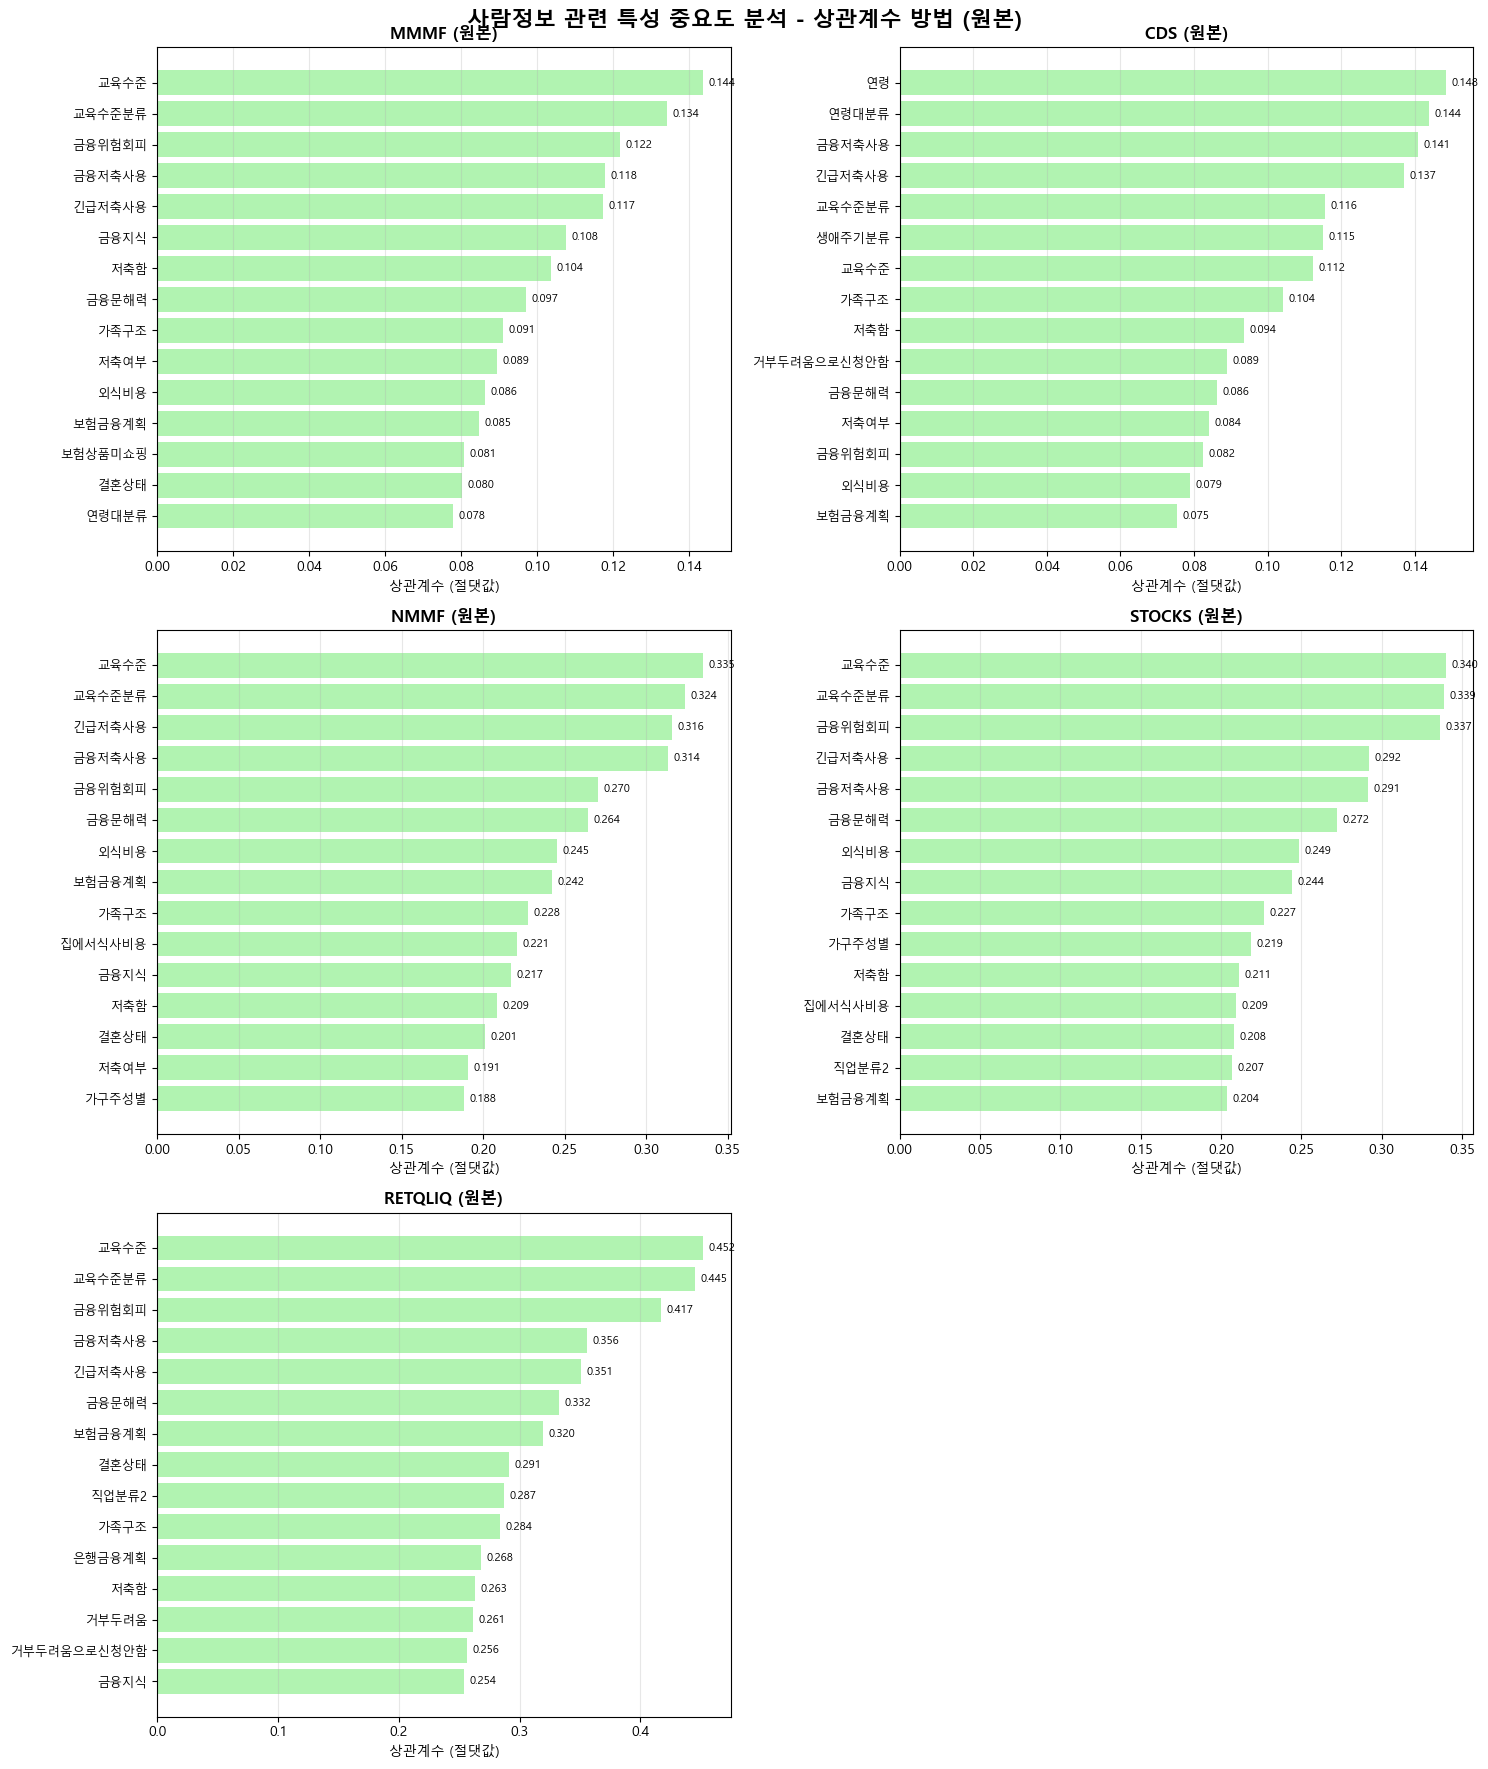

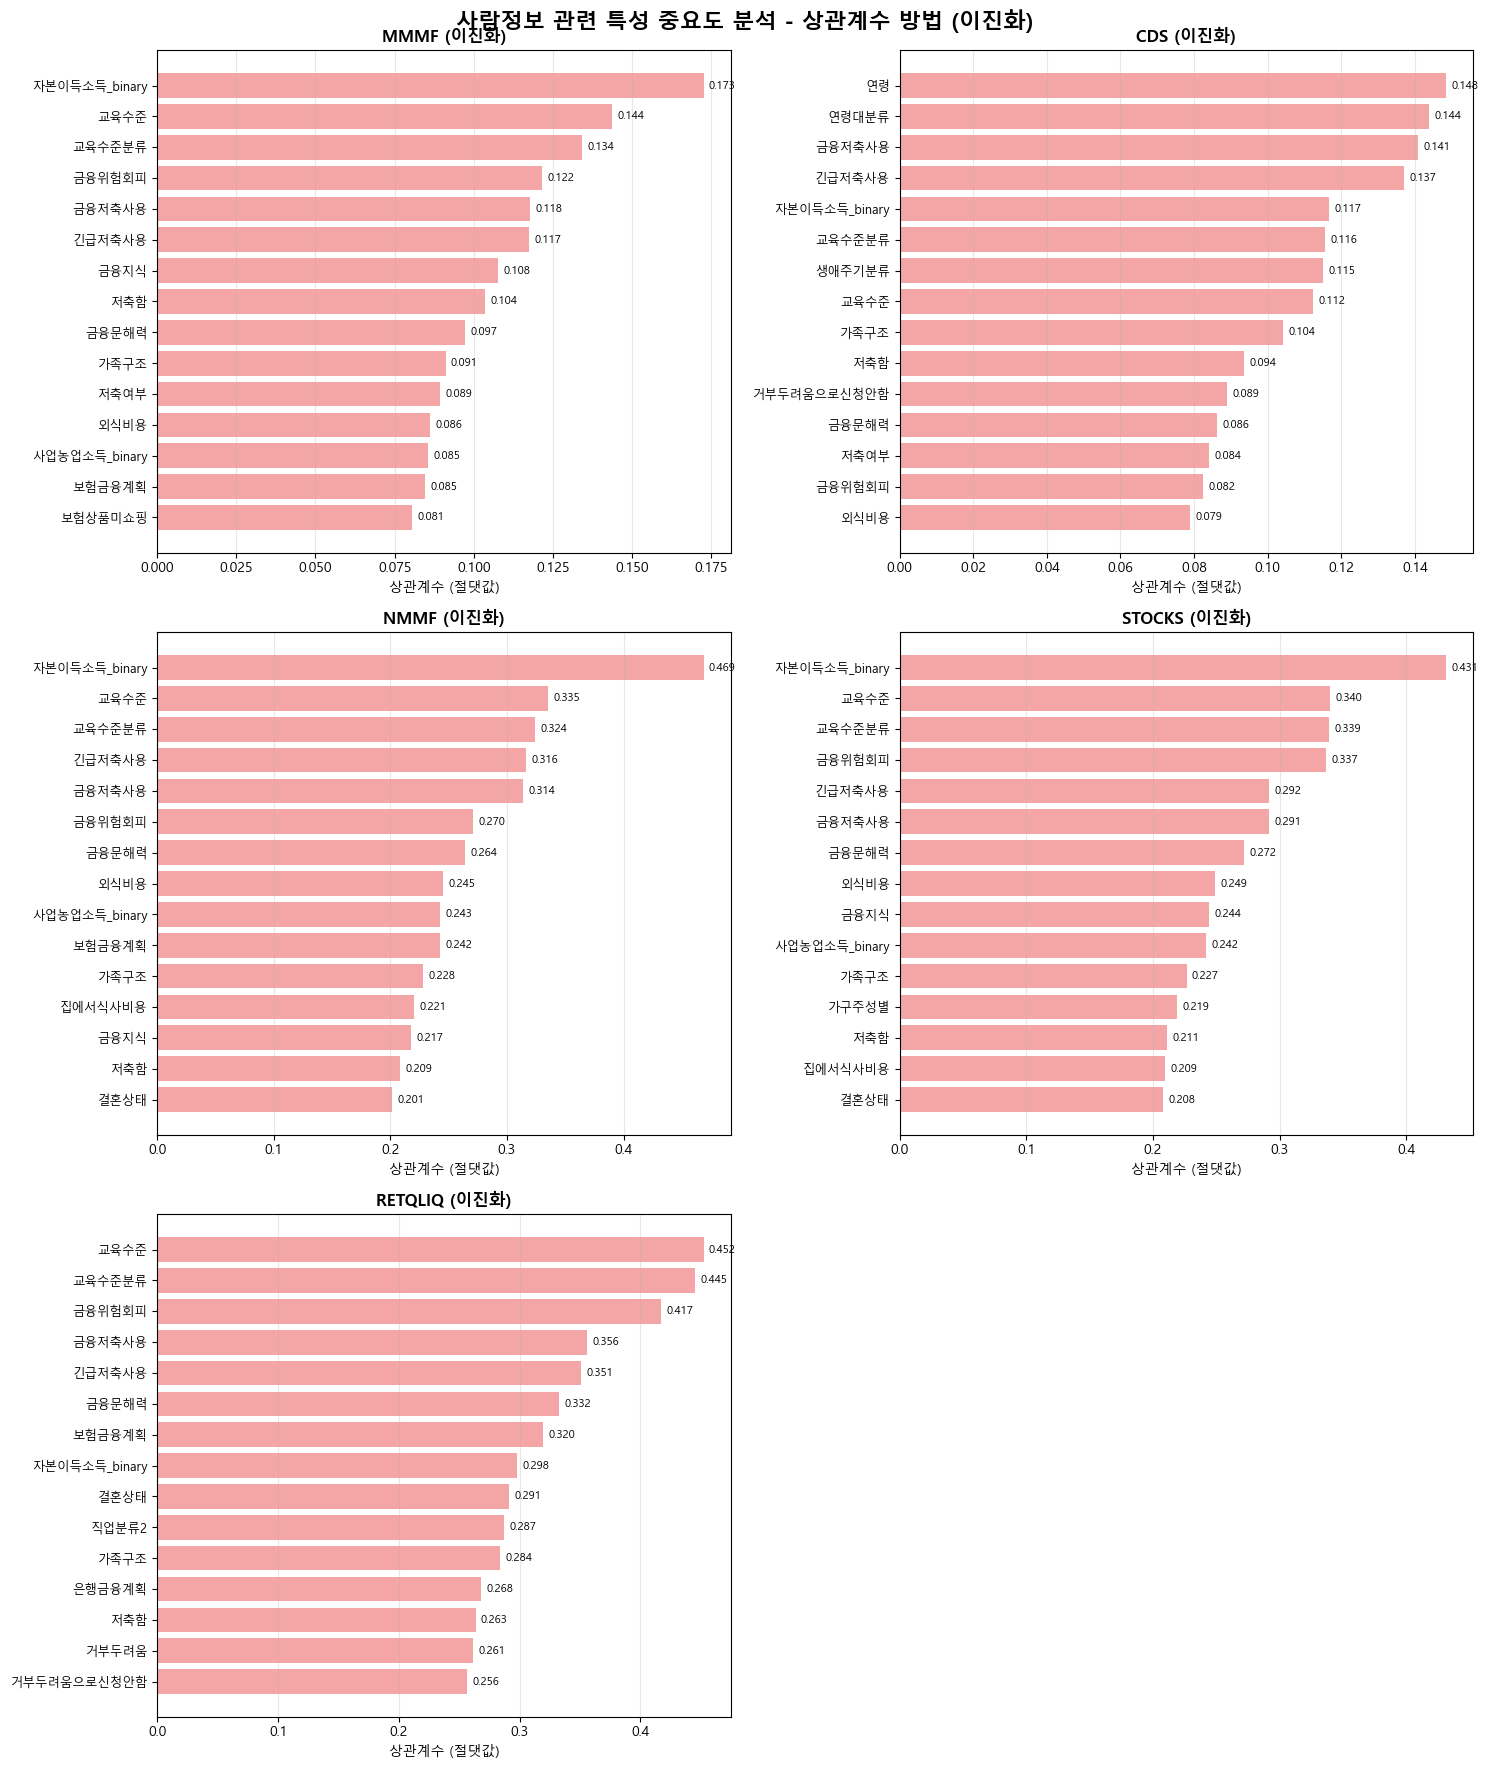

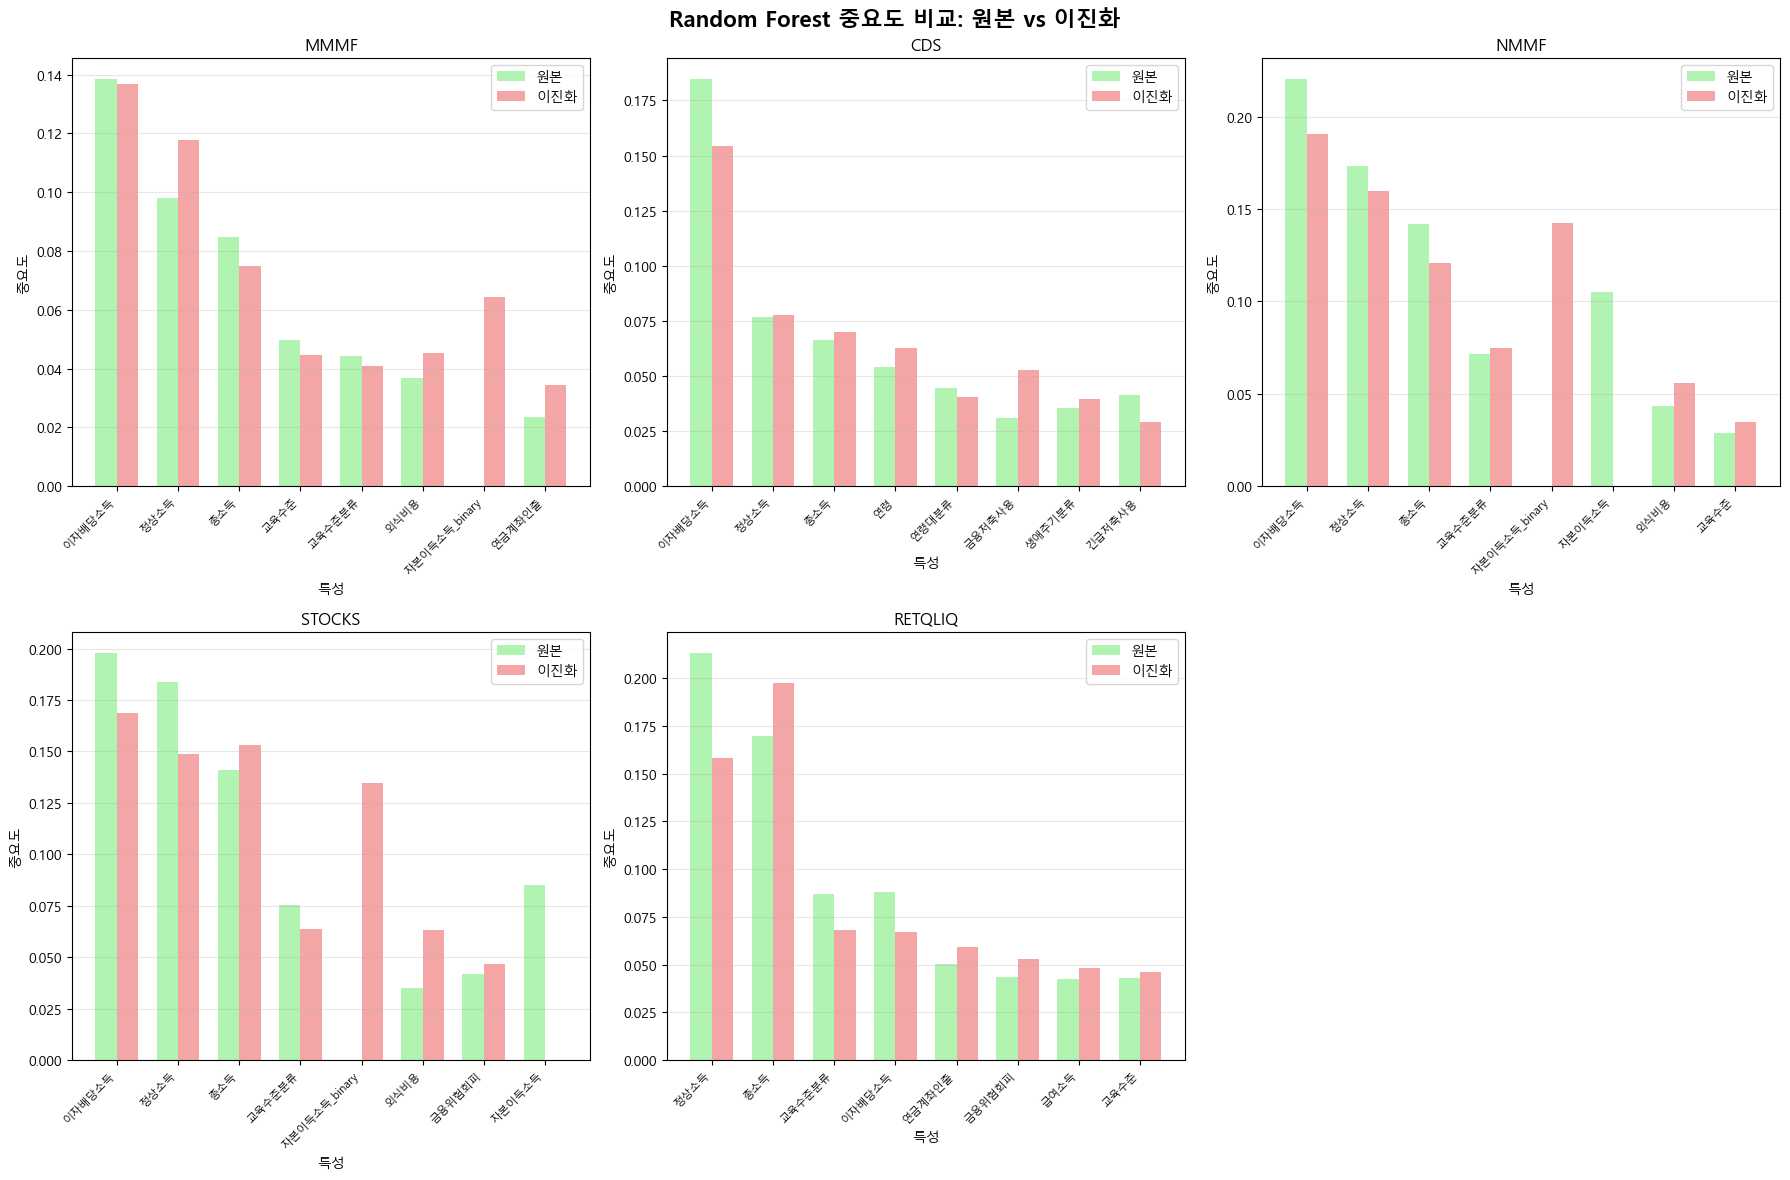


‚úÖ Ïù¥ÏßÑÌôî Ï†ÑÌõÑ ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù ÏôÑÎ£å!
üìä ÏÉùÏÑ±Îêú Í∑∏ÎûòÌîÑ:
  1. demographic_correlation_importance_original.png - ÏõêÎ≥∏ ÏÉÅÍ¥ÄÍ≥ÑÏàò
  2. demographic_correlation_importance_binary.png - Ïù¥ÏßÑÌôî ÏÉÅÍ¥ÄÍ≥ÑÏàò
  3. rf_importance_comparison.png - Random Forest Ï§ëÏöîÎèÑ ÎπÑÍµê


In [12]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
original_df = pd.read_csv('C:/Project2/CodeDoc/data/SCFP/SCFP2022_ÌïúÍ∏Ä.csv')

# Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±(3Î≤àÏö©)
df_financial = original_df[financial_features].copy()

# ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df_all_features = original_df[all_features].copy()

# Ïã§Ï†ú Í∏àÏï° Ïª¨ÎüºÎ™ÖÏóê ÎßûÏ∂∞ Ï¢ÖÏÜçÎ≥ÄÏàò ÏÉùÏÑ±
target_mapping = {
    'MMMF': 'Îã®Í∏∞Í∏àÏúµÏÉÅÌíàÌéÄÎìú',           # Ïú†ÎèôÏÑ±ÏûêÏÇ∞ Í∏àÏï°Ïù¥ 0 Ïù¥ÏÉÅÏù¥Î©¥ 1
    'CDS': 'ÏñëÎèÑÏÑ±ÏòàÍ∏àÏ¶ùÏÑú',       # Ï†ïÍ∏∞ÏòàÍ∏à Í∏àÏï°Ïù¥ 0 Ïù¥ÏÉÅÏù¥Î©¥ 1  
    'NMMF': 'ÎπÑÎ®∏ÎãàÎßàÏºìÌéÄÎìú',      # ÎπÑÎ®∏ÎãàÎßàÏºìÌéÄÎìú Í∏àÏï°Ïù¥ 0 Ïù¥ÏÉÅÏù¥Î©¥ 1
    'STOCKS': 'Ï£ºÏãùÎ≥¥Ïú†',         # Ï£ºÏãù Í∏àÏï°Ïù¥ 0 Ïù¥ÏÉÅÏù¥Î©¥ 1
    'RETQLIQ': 'Ìá¥ÏßÅÏ§ÄÎπÑÍ∏àÏú†ÎèôÏÑ±'  # Ìá¥ÏßÅÏó∞Í∏à Í∏àÏï°Ïù¥ 0 Ïù¥ÏÉÅÏù¥Î©¥ 1
}

for target, amount_col in target_mapping.items():
    if amount_col in original_df.columns:
        # Í∏àÏï°Ïù¥ 0Î≥¥Îã§ ÌÅ¨Î©¥ 1(Î≥¥Ïú†), ÏïÑÎãàÎ©¥ 0(ÎØ∏Î≥¥Ïú†)
        df_financial[target] = (original_df[amount_col] > 0).astype(int)
        df_all_features[target] = (original_df[amount_col] > 0).astype(int)
        
        # Î≥¥Ïú†Ïú® ÌôïÏù∏
        holding_rate = df_financial[target].mean()
        print(f"{target} ({amount_col}): Î≥¥Ïú†Ïú® {holding_rate*100:.1f}%")
    else:
        print(f"‚ö†Ô∏è {amount_col} Ïª¨ÎüºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(f"\n=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥:===")
print(f"Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_financial.shape}")
print(f"ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_all_features.shape}")

print(f"\n=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥:===")
print(f"Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_financial.shape}")
print(f"ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_all_features.shape}")
print(f"Ï¢ÖÏÜçÎ≥ÄÏàò Ï°¥Ïû¨ Ïó¨Î∂Ä: {[col for col in targets if col in df_financial.columns]}")
print(f"Í∏àÏúµ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàò Ï°¥Ïû¨ Ïó¨Î∂Ä: {len([col for col in financial_features if col in df_financial.columns])}Í∞ú")
print(f"ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàò Ï°¥Ïû¨ Ïó¨Î∂Ä: {len([col for col in df_all_features if col in df_all_features.columns])}Í∞ú")

# Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Í∞í ÌôïÏù∏
print(f"\n‚Äª Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Í∞í ÌôïÏù∏:")
financial_missing_info = df_financial[financial_features + targets].isnull().sum()
if financial_missing_info.sum() > 0:
    print(f"‚óé Í∏àÏúµ Í¥ÄÎ†® Í≤∞Ï∏°Í∞í ÏûàÎäî Ïª¨Îüº:")
    print(financial_missing_info[financial_missing_info > 0])
else:
    print("‚ñ∂ Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°Í∞í ÏóÜÏùå")

# ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Í∞í ÌôïÏù∏
print(f"\n‚Äª ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Í∞í ÌôïÏù∏:")
demographic_missing_info = df_all_features[all_features + targets].isnull().sum()
if demographic_missing_info.sum() > 0:
    print(f"‚óé ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Í≤∞Ï∏°Í∞í ÏûàÎäî Ïª¨Îüº:")
    print(demographic_missing_info[demographic_missing_info > 0])
else:
    print("‚ñ∂ ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°Í∞í ÏóÜÏùå")

# ===== Ïù¥ÏßÑÌôî Ï≤òÎ¶¨ Ï∂îÍ∞Ä =====
print("\n" + "="*60)
print("‚ñ∂ ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù, ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù Ïù¥ÏßÑÌôî Ï≤òÎ¶¨")
print("="*60)

# Ïù¥ÏßÑÌôîÏö© Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df_all_features_binary = df_all_features.copy()

# ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù, ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù Ïù¥ÏßÑÌôî
if 'ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù' in df_all_features_binary.columns:
    df_all_features_binary['ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù_binary'] = (df_all_features_binary['ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù'] > 0).astype(int)
    business_income_count = df_all_features_binary['ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù_binary'].sum()
    print(f"ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù Î≥¥Ïú†Ïûê: {business_income_count}Î™Ö ({business_income_count/len(df_all_features_binary)*100:.1f}%)")

if 'ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù' in df_all_features_binary.columns:
    df_all_features_binary['ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù_binary'] = (df_all_features_binary['ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù'] > 0).astype(int)
    capital_income_count = df_all_features_binary['ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù_binary'].sum()
    print(f"ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù Î≥¥Ïú†Ïûê: {capital_income_count}Î™Ö ({capital_income_count/len(df_all_features_binary)*100:.1f}%)")

# Ïù¥ÏßÑÌôîÎêú ÌäπÏÑ± Î¶¨Ïä§Ìä∏ ÏÉùÏÑ± (ÏõêÎ≥∏ Ïª¨ÎüºÏùÄ Ï†úÍ±∞ÌïòÍ≥† Ïù¥ÏßÑÌôî Ïª¨Îüº Ï∂îÍ∞Ä)
all_features_binary = [col for col in all_features if col not in ['ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù', 'ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù']]
if 'ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù' in df_all_features_binary.columns:
    all_features_binary.append('ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù_binary')
if 'ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù' in df_all_features_binary.columns:
    all_features_binary.append('ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù_binary')

print(f"Ïù¥ÏßÑÌôî ÌõÑ ÌäπÏÑ± Ïàò: {len(all_features_binary)}Í∞ú")

# ===== ÏõêÎ≥∏ Î≤ÑÏ†Ñ Î∂ÑÏÑù =====
print("\n" + "="*60)
print("‚ñ∂ ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÌäπÏÑ± - ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∏∞Î∞ò Ï§ëÏöîÎèÑ (ÏõêÎ≥∏)")
print("="*60)

demographic_correlation_results = {}

for target in targets:
    if target not in df_all_features.columns:
        continue
        
    print(f"\n‚ñ∂ {target} ÏÉÅÏúÑ Ï§ëÏöî ÌäπÏÑ± (ÏõêÎ≥∏):")
    
    # ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
    correlations = []
    for feature in all_features:
        if feature in df_all_features.columns:
            corr = df_all_features[feature].corr(df_all_features[target])
            if not pd.isna(corr):
                correlations.append((feature, abs(corr), corr))
    
    # ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌÅ¨Í∏∞Ïàú Ï†ïÎ†¨
    correlations.sort(key=lambda x: x[1], reverse=True)
    demographic_correlation_results[target] = correlations
    
    # ÏÉÅÏúÑ 5Í∞ú Ï∂úÎ†•
    for i, (feature, abs_corr, orig_corr) in enumerate(correlations[:5]):
        direction = "+" if orig_corr > 0 else "-"
        print(f"  {i+1}. {feature:<25} ÏÉÅÍ¥ÄÍ≥ÑÏàò: {abs_corr:.3f} ({direction})")

print("\n" + "="*60)
print("‚ñ∂ ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÌäπÏÑ± - Random Forest Ï§ëÏöîÎèÑ (ÏõêÎ≥∏)")
print("="*60)

demographic_rf_results = {}

for target in targets:
    if target not in df_all_features.columns:
        continue
        
    print(f"\n‚ñ∂ {target} Random Forest Ï§ëÏöîÎèÑ (ÏõêÎ≥∏):")
    
    # Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
    X = df_all_features[all_features].fillna(0)  # Í∞ÑÎã®Ìûà Í≤∞Ï∏°Í∞íÏùÑ 0ÏúºÎ°ú Ï≤òÎ¶¨
    y = df_all_features[target]
    
    # Random Forest ÌïôÏäµ
    rf = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=5)
    rf.fit(X, y)
    
    # Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
    importances = rf.feature_importances_
    feature_importance = list(zip(all_features, importances))
    feature_importance.sort(key=lambda x: x[1], reverse=True)
    
    demographic_rf_results[target] = feature_importance
    
    # ÏÉÅÏúÑ 5Í∞ú Ï∂úÎ†•
    for i, (feature, importance) in enumerate(feature_importance[:5]):
        print(f"  {i+1}. {feature:<25} Ï§ëÏöîÎèÑ: {importance:.3f}")

# ===== Ïù¥ÏßÑÌôî Î≤ÑÏ†Ñ Î∂ÑÏÑù =====
print("\n" + "="*60)
print("‚ñ∂ ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÌäπÏÑ± - ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∏∞Î∞ò Ï§ëÏöîÎèÑ (Ïù¥ÏßÑÌôî)")
print("="*60)

demographic_correlation_results_binary = {}

for target in targets:
    if target not in df_all_features_binary.columns:
        continue
        
    print(f"\n‚ñ∂ {target} ÏÉÅÏúÑ Ï§ëÏöî ÌäπÏÑ± (Ïù¥ÏßÑÌôî):")
    
    # ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
    correlations = []
    for feature in all_features_binary:
        if feature in df_all_features_binary.columns:
            corr = df_all_features_binary[feature].corr(df_all_features_binary[target])
            if not pd.isna(corr):
                correlations.append((feature, abs(corr), corr))
    
    # ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌÅ¨Í∏∞Ïàú Ï†ïÎ†¨
    correlations.sort(key=lambda x: x[1], reverse=True)
    demographic_correlation_results_binary[target] = correlations
    
    # ÏÉÅÏúÑ 5Í∞ú Ï∂úÎ†•
    for i, (feature, abs_corr, orig_corr) in enumerate(correlations[:5]):
        direction = "+" if orig_corr > 0 else "-"
        print(f"  {i+1}. {feature:<30} ÏÉÅÍ¥ÄÍ≥ÑÏàò: {abs_corr:.3f} ({direction})")

print("\n" + "="*60)
print("‚ñ∂ ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÌäπÏÑ± - Random Forest Ï§ëÏöîÎèÑ (Ïù¥ÏßÑÌôî)")
print("="*60)

demographic_rf_results_binary = {}

for target in targets:
    if target not in df_all_features_binary.columns:
        continue
        
    print(f"\n‚ñ∂ {target} Random Forest Ï§ëÏöîÎèÑ (Ïù¥ÏßÑÌôî):")
    
    # Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
    X = df_all_features_binary[all_features_binary].fillna(0)
    y = df_all_features_binary[target]
    
    # Random Forest ÌïôÏäµ
    rf = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=5)
    rf.fit(X, y)
    
    # Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
    importances = rf.feature_importances_
    feature_importance = list(zip(all_features_binary, importances))
    feature_importance.sort(key=lambda x: x[1], reverse=True)
    
    demographic_rf_results_binary[target] = feature_importance
    
    # ÏÉÅÏúÑ 5Í∞ú Ï∂úÎ†•
    for i, (feature, importance) in enumerate(feature_importance[:5]):
        print(f"  {i+1}. {feature:<30} Ï§ëÏöîÎèÑ: {importance:.3f}")

# ===== ÎπÑÍµê Î∂ÑÏÑù =====
print("\n" + "="*60)
print("‚ñ∂ Ïù¥ÏßÑÌôî Ï†ÑÌõÑ Ï§ëÏöîÎèÑ Î≥ÄÌôî ÎπÑÍµê")
print("="*60)

for target in targets:
    if target not in demographic_rf_results or target not in demographic_rf_results_binary:
        continue
        
    print(f"\n‚ñ∂ {target} - ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù, ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù Ï§ëÏöîÎèÑ Î≥ÄÌôî:")
    
    # ÏõêÎ≥∏ÏóêÏÑú Ìï¥Îãπ Î≥ÄÏàòÎì§ Ï∞æÍ∏∞
    original_business = next((imp for feat, imp in demographic_rf_results[target] if feat == 'ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù'), 0)
    original_capital = next((imp for feat, imp in demographic_rf_results[target] if feat == 'ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù'), 0)
    
    # Ïù¥ÏßÑÌôîÏóêÏÑú Ìï¥Îãπ Î≥ÄÏàòÎì§ Ï∞æÍ∏∞
    binary_business = next((imp for feat, imp in demographic_rf_results_binary[target] if feat == 'ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù_binary'), 0)
    binary_capital = next((imp for feat, imp in demographic_rf_results_binary[target] if feat == 'ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù_binary'), 0)
    
    print(f"  ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù:   {original_business:.4f} ‚Üí {binary_business:.4f} (Î≥ÄÌôî: {binary_business-original_business:+.4f})")
    print(f"  ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù:   {original_capital:.4f} ‚Üí {binary_capital:.4f} (Î≥ÄÌôî: {binary_capital-original_capital:+.4f})")

# ===== ÏãúÍ∞ÅÌôî =====
print("\n‚ñ∂ ÏãúÍ∞ÅÌôî ÏÉùÏÑ± Ï§ë...")

# 1. ÏõêÎ≥∏ Î≤ÑÏ†Ñ - ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∑∏ÎûòÌîÑ
fig1, axes1 = plt.subplots(3, 2, figsize=(15, 18))
fig1.suptitle('ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù - ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∞©Î≤ï (ÏõêÎ≥∏)', fontsize=16, fontweight='bold')

for i, target in enumerate(targets):
    if target not in demographic_correlation_results:
        continue
        
    row = i // 2
    col = i % 2
    
    # ÏÉÅÏúÑ 15Í∞ú ÌäπÏÑ± ÏÑ†ÌÉù
    top_15 = demographic_correlation_results[target][:15]
    features_list = [item[0] for item in top_15]
    correlations_list = [item[1] for item in top_15]
    
    # Í∞ÄÎ°ú ÎßâÎåÄ Í∑∏ÎûòÌîÑ
    y_pos = range(len(features_list))
    bars = axes1[row, col].barh(y_pos, correlations_list, color='lightgreen', alpha=0.7)
    
    # ÏÑ§Ï†ï
    axes1[row, col].set_yticks(y_pos)
    axes1[row, col].set_yticklabels(features_list, fontsize=9)
    axes1[row, col].set_xlabel('ÏÉÅÍ¥ÄÍ≥ÑÏàò (Ï†àÎåìÍ∞í)', fontsize=10)
    axes1[row, col].set_title(f'{target} (ÏõêÎ≥∏)', fontsize=12, fontweight='bold')
    axes1[row, col].grid(axis='x', alpha=0.3)
    
    # ÎßâÎåÄ ÎÅùÏóê Í∞í ÌëúÏãú
    for j, v in enumerate(correlations_list):
        if correlations_list:
            axes1[row, col].text(v + max(correlations_list)*0.01, j, f'{v:.3f}', 
                               va='center', fontsize=8)
    
    # yÏ∂ï ÏàúÏÑú Îí§ÏßëÍ∏∞ (ÎÜíÏùÄ Í∞íÏù¥ ÏúÑÎ°ú)
    axes1[row, col].invert_yaxis()

# Îπà subplot Ïà®Í∏∞Í∏∞
if len(targets) == 5:
    axes1[2, 1].set_visible(False)

plt.tight_layout()
plt.savefig('chart/demographic_correlation_importance_original.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Ïù¥ÏßÑÌôî Î≤ÑÏ†Ñ - ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∑∏ÎûòÌîÑ
fig2, axes2 = plt.subplots(3, 2, figsize=(15, 18))
fig2.suptitle('ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù - ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∞©Î≤ï (Ïù¥ÏßÑÌôî)', fontsize=16, fontweight='bold')

for i, target in enumerate(targets):
    if target not in demographic_correlation_results_binary:
        continue
        
    row = i // 2
    col = i % 2
    
    # ÏÉÅÏúÑ 15Í∞ú ÌäπÏÑ± ÏÑ†ÌÉù
    top_15 = demographic_correlation_results_binary[target][:15]
    features_list = [item[0] for item in top_15]
    correlations_list = [item[1] for item in top_15]
    
    # Í∞ÄÎ°ú ÎßâÎåÄ Í∑∏ÎûòÌîÑ
    y_pos = range(len(features_list))
    bars = axes2[row, col].barh(y_pos, correlations_list, color='lightcoral', alpha=0.7)
    
    # ÏÑ§Ï†ï
    axes2[row, col].set_yticks(y_pos)
    axes2[row, col].set_yticklabels(features_list, fontsize=9)
    axes2[row, col].set_xlabel('ÏÉÅÍ¥ÄÍ≥ÑÏàò (Ï†àÎåìÍ∞í)', fontsize=10)
    axes2[row, col].set_title(f'{target} (Ïù¥ÏßÑÌôî)', fontsize=12, fontweight='bold')
    axes2[row, col].grid(axis='x', alpha=0.3)
    
    # ÎßâÎåÄ ÎÅùÏóê Í∞í ÌëúÏãú
    for j, v in enumerate(correlations_list):
        if correlations_list:
            axes2[row, col].text(v + max(correlations_list)*0.01, j, f'{v:.3f}', 
                               va='center', fontsize=8)
    
    # yÏ∂ï ÏàúÏÑú Îí§ÏßëÍ∏∞ (ÎÜíÏùÄ Í∞íÏù¥ ÏúÑÎ°ú)
    axes2[row, col].invert_yaxis()

# Îπà subplot Ïà®Í∏∞Í∏∞
if len(targets) == 5:
    axes2[2, 1].set_visible(False)

plt.tight_layout()
plt.savefig('chart/demographic_correlation_importance_binary.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Random Forest Ï§ëÏöîÎèÑ ÎπÑÍµê (ÏõêÎ≥∏ vs Ïù¥ÏßÑÌôî)
fig3, axes3 = plt.subplots(2, 3, figsize=(18, 12))
fig3.suptitle('Random Forest Ï§ëÏöîÎèÑ ÎπÑÍµê: ÏõêÎ≥∏ vs Ïù¥ÏßÑÌôî', fontsize=16, fontweight='bold')

for i, target in enumerate(targets):
    if target not in demographic_rf_results or target not in demographic_rf_results_binary:
        continue
        
    row = i // 3
    col = i % 3
    
    # ÏÉÅÏúÑ 10Í∞ú ÌäπÏÑ± ÏÑ†ÌÉù
    top_10_original = [item[0] for item in demographic_rf_results[target][:10]]
    top_10_binary = [item[0] for item in demographic_rf_results_binary[target][:10]]
    
    # Í≥µÌÜµ ÌäπÏÑ±Îì§ + Í¥ÄÏã¨ ÌäπÏÑ±Îì§
    important_features = list(set(top_10_original + top_10_binary + 
                                ['ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù', 'ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù', 'ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù_binary', 'ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù_binary']))
    
    original_values = []
    binary_values = []
    feature_names = []
    
    for feature in important_features:
        if feature in ['ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù_binary', 'ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù_binary']:
            # Ïù¥ÏßÑÌôî ÌäπÏÑ±ÏùÄ Ïù¥ÏßÑÌôî Í≤∞Í≥ºÏóêÎßå Ï°¥Ïû¨
            original_val = 0
            binary_val = next((imp for feat, imp in demographic_rf_results_binary[target] if feat == feature), 0)
        elif feature in ['ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù', 'ÏûêÎ≥∏Ïù¥ÎìùÏÜåÎìù']:
            # ÏõêÎ≥∏ ÌäπÏÑ±ÏùÄ ÏõêÎ≥∏ Í≤∞Í≥ºÏóêÎßå Ï°¥Ïû¨
            original_val = next((imp for feat, imp in demographic_rf_results[target] if feat == feature), 0)
            binary_val = 0
        else:
            # Í≥µÌÜµ ÌäπÏÑ±
            original_val = next((imp for feat, imp in demographic_rf_results[target] if feat == feature), 0)
            binary_val = next((imp for feat, imp in demographic_rf_results_binary[target] if feat == feature), 0)
        
        if original_val > 0.001 or binary_val > 0.001:  # ÏµúÏÜå ÏûÑÍ≥ÑÍ∞í
            original_values.append(original_val)
            binary_values.append(binary_val)
            feature_names.append(feature)
    
    # ÏÉÅÏúÑ 8Í∞úÎßå ÏÑ†ÌÉù
    combined_importance = [(name, orig + binary) for name, orig, binary in zip(feature_names, original_values, binary_values)]
    combined_importance.sort(key=lambda x: x[1], reverse=True)
    
    top_8_names = [item[0] for item in combined_importance[:8]]
    top_8_original = [original_values[feature_names.index(name)] for name in top_8_names]
    top_8_binary = [binary_values[feature_names.index(name)] for name in top_8_names]
    
    # Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
    x_pos = np.arange(len(top_8_names))
    width = 0.35
    
    bars1 = axes3[row, col].bar(x_pos - width/2, top_8_original, width, label='ÏõêÎ≥∏', color='lightgreen', alpha=0.7)
    bars2 = axes3[row, col].bar(x_pos + width/2, top_8_binary, width, label='Ïù¥ÏßÑÌôî', color='lightcoral', alpha=0.7)
    
    axes3[row, col].set_xlabel('ÌäπÏÑ±')
    axes3[row, col].set_ylabel('Ï§ëÏöîÎèÑ')
    axes3[row, col].set_title(f'{target}')
    axes3[row, col].set_xticks(x_pos)
    axes3[row, col].set_xticklabels(top_8_names, rotation=45, ha='right', fontsize=8)
    axes3[row, col].legend()
    axes3[row, col].grid(axis='y', alpha=0.3)

# Îπà subplot Ïà®Í∏∞Í∏∞
if len(targets) == 5:
    axes3[1, 2].set_visible(False)

plt.tight_layout()
plt.savefig('chart/rf_importance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n‚úÖ Ïù¥ÏßÑÌôî Ï†ÑÌõÑ ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù ÏôÑÎ£å!")
print("üìä ÏÉùÏÑ±Îêú Í∑∏ÎûòÌîÑ:")
print("  1. demographic_correlation_importance_original.png - ÏõêÎ≥∏ ÏÉÅÍ¥ÄÍ≥ÑÏàò")
print("  2. demographic_correlation_importance_binary.png - Ïù¥ÏßÑÌôî ÏÉÅÍ¥ÄÍ≥ÑÏàò")
print("  3. rf_importance_comparison.png - Random Forest Ï§ëÏöîÎèÑ ÎπÑÍµê")